In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import pickle
import joblib 
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn import tree
import seaborn as sn


In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [3]:
# Machine Learning Algorithm are categorized into three main category 1.supervised 2.unsupervised 3.reinforcement learning

In [4]:
# supoervised learning:
#     where in the given data set you have your class label or target variable present 

In [5]:
# # unsupervised learning learning:
#       all you have set of features you dont know about your target variable or class label using this dataset we try to identify the underlying structure in that data  or we 
#     try to find the clusters in that data and we can make predictions out of it 
#     k means is a very popular clustering 

In [6]:
# K means clustering :

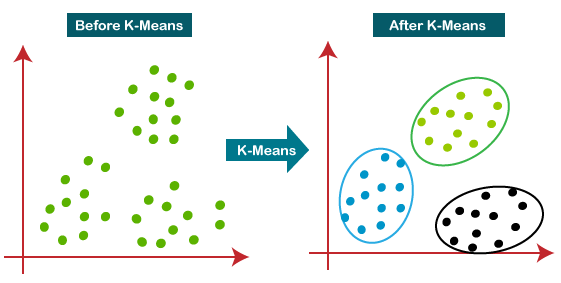

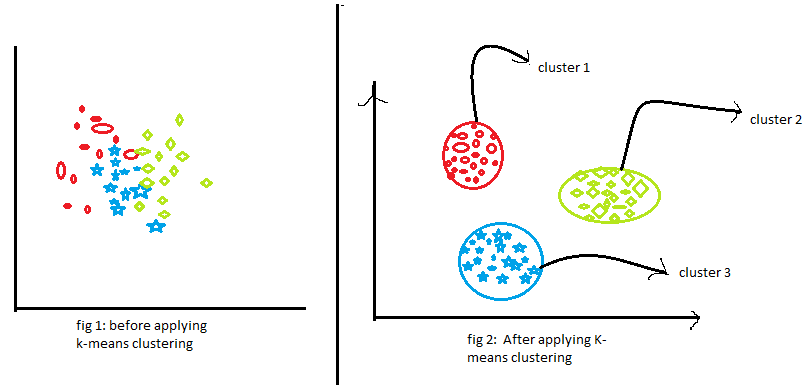

In [7]:
# here two axis represent two features and you want to identify cluster in this dataset
# now when the data set is given to you, you dont have any information on target variable so you dont know what you are looking for all you are trying 
# to do is identify some structure into it and one way of looking into this three clusters just by visual examination we can say that this dataset has
# these tow cluster and k means helps you identify these clusters now k in k means is a free parameter wherein before you start the algorithm you 
# have to tell the algorithm what is the value of k that you are looking for here our k is equal to three so lets say you have the this dataset
# you start with k is equal to three and the first step is to identify two random point which you consider as the center of those two clusters we call them
# CENTROIDS as well so you just put three random points here if k is 4 then you will put four random points ans these could be placed any where 
# in this 2D plane x-y doesnt matter next step is to identify the distance of each of these datapoints from these centroids
# so for example this datapoint is more near to red centroid hence we will say it belongs to red cluster of this centroid
# where this data point is more near to green centroid so we will say this belongs to green cluster
# the simple mathematical way to identify the distance is to draw this kind of line connecting the line betweeen the those two centroids
# then a perpendicular line anything on the left hand side is red cluster on right side is green cluster so there you go you
# already have your two imperfect clunky clusters and now we try to improve these clusters so you only got your two clusters
# now we will make them better and better at every stage and the way you do that is you will try to adjust the centroids for these two
# clusters for example for this raid cluster which is these four data points you will try to find the center of gravity almost
# and you will put the red center there and you do the same thing for green one
# so you get this when you make the adjustment and now you repeat the same process again you recompute the distance of each of each 
# of these points from this centroids and then if the point is more near to red you put it in a red cluster otherwise you put in a
# clean green cluster then you repeat the same method and see now these points got changed from green to red so they more near to red thats why
# they're in red cluster and you keep on repeating this process to recalculate your centroiids  recalculate the distance of individual data points 
# from dthese centroids and readjustment the cluster untill the point that none of the datapoints change the cluster so here 
# now if there is only one green which is changing its cluster so now its in red but after this we are done even if you try to 
# recompute everything and none of these data points will change the position hence we can say that this is final so
# these are now my final clusters now the most inportant point here is you need to supply k to your algorithm but what is 
#  a good number on k because here we have two dimensional space in reality you will have so many feature and it hard to visualize that data
#     on a scatter plot so...




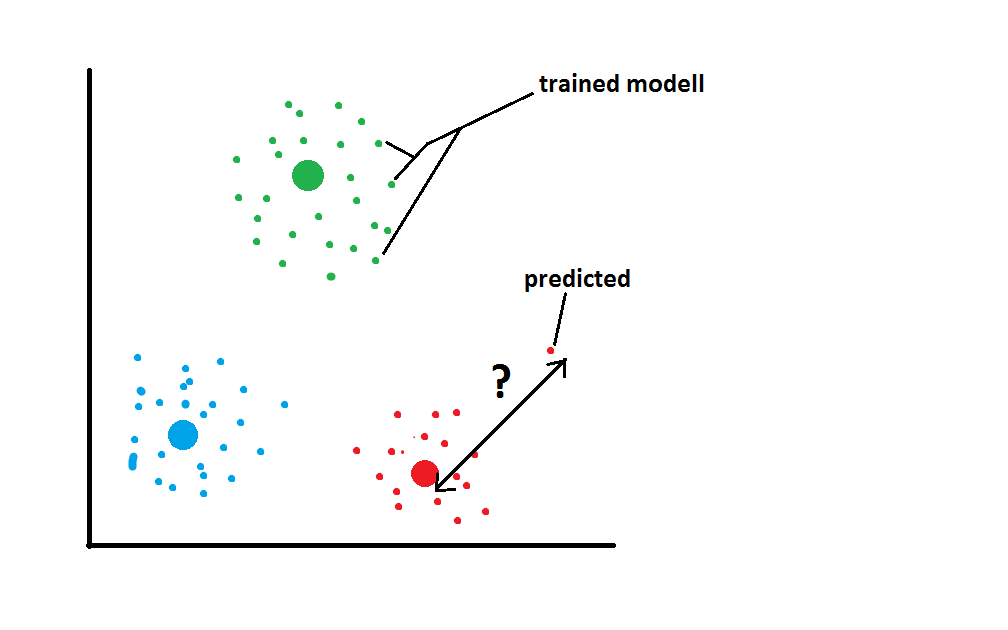

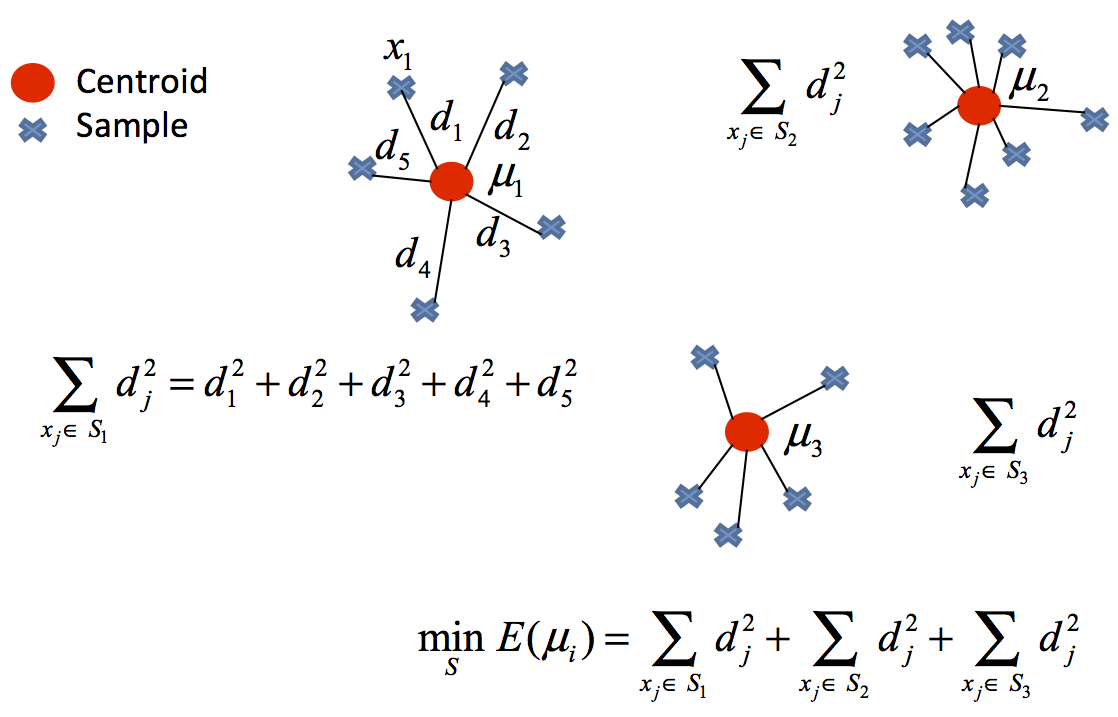

In [8]:
# How to determine correct number of cluster(k)?

In [9]:
# SSE: Sum of Squreed  Errors

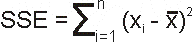

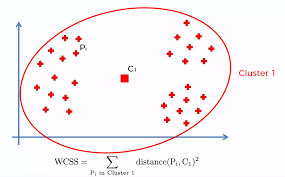

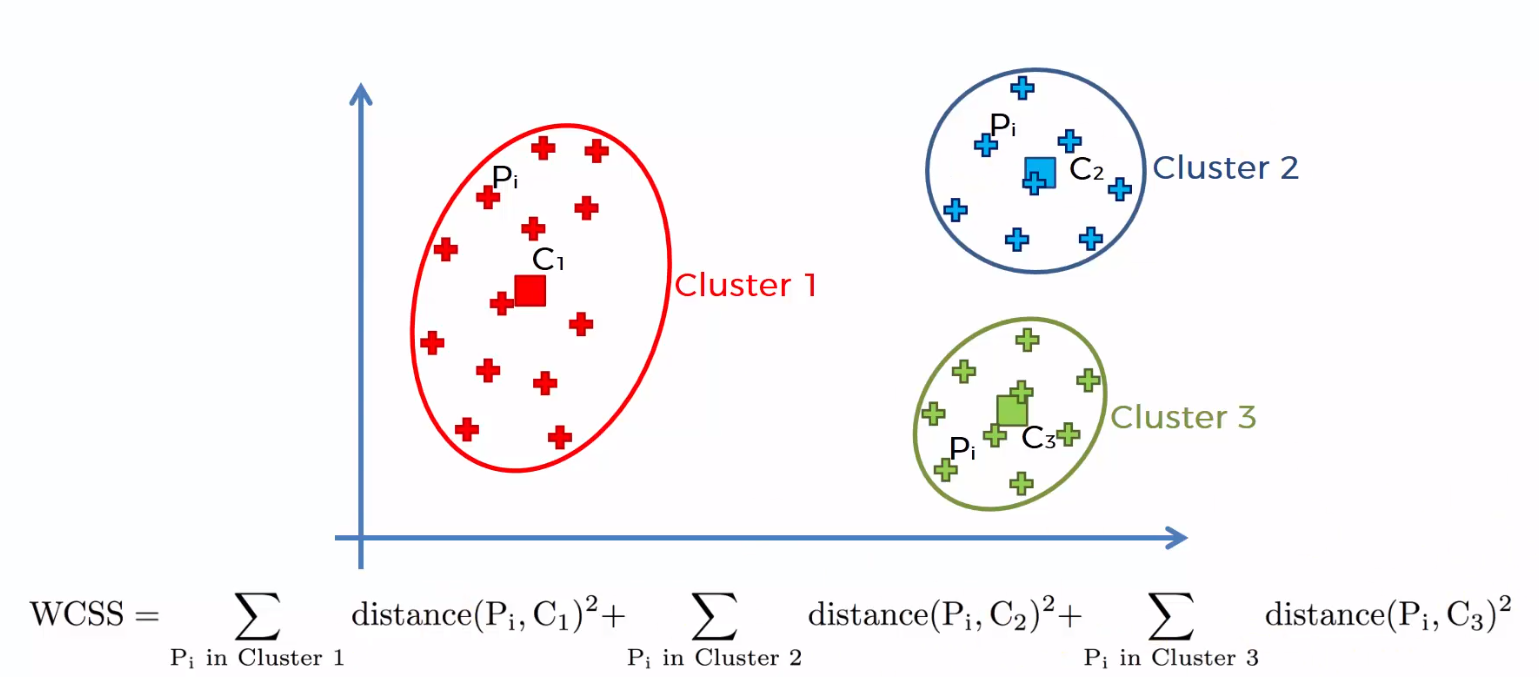

In [10]:
# SSE = SSE1+SSE2+SSE3+...

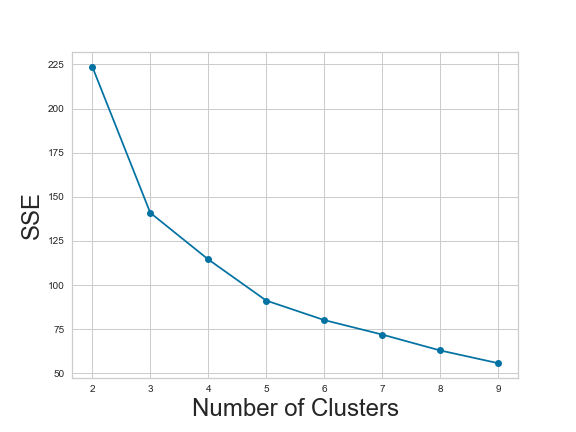

In [11]:
# whenever it will increse the k(no of clustering) it decrease the SSE
# at a point you can consider all are datapoints in one cluster individual where SSE becomes almost zero 
# so datapoints at 9 or more than 9 value of SSE almost zero 
# so error will keep on reducing and the general guideline to find out ELBOW 
# elbow is in this chart this point k=5 is short of like an elbow here is a good cluster number for example
# whatever  the dataset the chart is representing a good k number would be 5 
# that was an elbow technique 

In [12]:
df = pd.read_csv('D:/cars/kincome.txt')

In [13]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [14]:
# try to identify some categoristic these groups
# first i try to poot in scatter plot

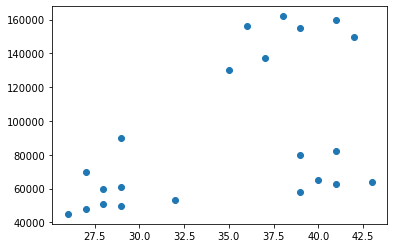

In [15]:
plt.scatter(df['Age'], df['Income($)'])

In [16]:
km = KMeans(n_clusters=3)

In [17]:
km

KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [19]:
y_predicted # represent three cluster represent as 0, 1, 2 like 1st two data points belongs to 0, 2nd two points belongs to
#  2, and so on

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [20]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


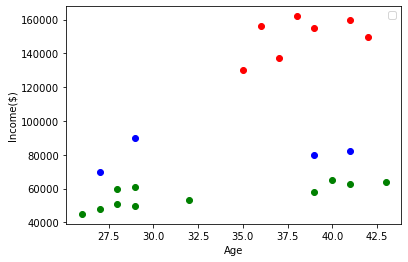

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [22]:
#  green and blue cluster are discreate because our income scaling is not correct

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [25]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [26]:
df # now age and income are proper scaled

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [29]:
# df.drop('cluster', axis='columns', inplace=True)
# df

In [30]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


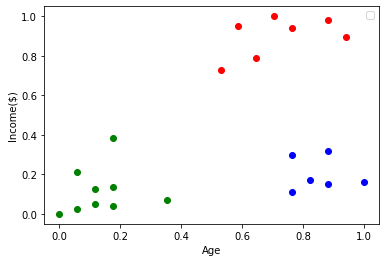

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [32]:
k_rng = range (1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22037641690770673,
 0.17840674931327935,
 0.13781880133764024,
 0.10497488680620906]

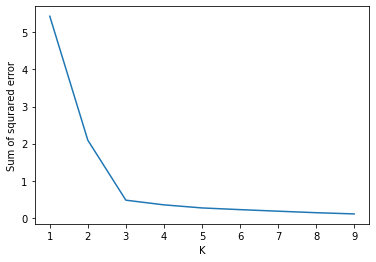

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squrared error')
plt.plot(k_rng,sse)

In [35]:
# k=3 is elbow point and also have 3 cluster

In [36]:
# # Exercise:
# 1.Use iris flower dataset from sklearn library and try to form cxlusters  of flowers using petal width and length feaures.Drop other two features 
# for simplicity
# 2.figure out if any preprocessing such as scaling would help here
# 3.Draw elbow plot and from that figure out optimal value of k

In [37]:
# Theory and predict titanic survival using naive bayes
# Build email spam detector

In [38]:
# # CARDS: NAIVE BAYES
# Total no of cards = 52
# Total diamonds = 13
# no of queen in dimonds = 1
# probablity:
#     p(queen/diamond)=1/13
    
# that is conditional probablity:
#     p(A/B) = probablity of event A knowing that event that event B has already occurred
    
#     P(A/B) = (p(B/A)*p(A))/p(B)
    
# p(queen/diamonds) = (p(diamond/queen)*p(queen))/p(diamond) = 1
         
# p(diamonds/queen) = 1/4
# p(queen) = 1/13
# p(diamond) = 1/4

In [39]:
# Titanic survival:
# p(survived/(male&class&age&cabin&fare))

# this is called naive byase 
# make a naib=ve assumption that features such as male , class,age,cabin,fare etc.
# are independent of each other

In [40]:
# Naive bayes classifier: luis serrano
# email spam dedector 
# charecter recognition
# weather dedection
# face detection

In [41]:
df = pd.read_csv("D:/cars/titanic2.txt")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [43]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [44]:
target = df.Survived
inputs = df.drop('Survived',axis='columns')

In [45]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [47]:
dummies = pd.get_dummies(inputs.Sex) # to get dummy variable of sex(string) value to change numerical value one hot encoding
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [48]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [49]:
inputs.drop('Sex', axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [50]:
inputs.columns[inputs.isna().any()] # to find any not a number(NaN) value present

Index(['Age'], dtype='object')

In [51]:
inputs.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [52]:
inputs.Age[:10] # in index 5 there is one NaN value

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [53]:
 inputs.Age = inputs.Age.fillna(inputs.Age.mean()) # to fill the NaN value with the mean value of age

In [54]:
inputs.Age[:10] # age of index 5 filled with mean value 

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [55]:
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [56]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [57]:
len(x_train)

712

In [58]:
len(x_test)

179

In [59]:
len(inputs)

891

In [60]:
model = GaussianNB() #? model for naive bayes -BELL CURVE

In [61]:
model.fit(x_train, y_train)

GaussianNB()

In [62]:
model.score(x_test,y_test)

0.7932960893854749

In [63]:
x_test[:10]

,Pclass,Age,Fare,female,male
178,2,30.000000,13.0000,0,1
149,2,42.000000,13.0000,0,1
617,3,26.000000,16.1000,1,0
264,3,29.699118,7.7500,1,0
590,3,35.000000,7.1250,0,1
532,3,17.000000,7.2292,0,1
867,1,31.000000,50.4958,0,1
113,3,20.000000,9.8250,1,0
123,2,32.500000,13.0000,1,0
862,1,48.000000,25.9292,1,0


In [64]:
y_test[:10]

178    0
149    0
617    0
264    0
590    0
532    0
867    0
113    0
123    1
862    1
Name: Survived, dtype: int64

In [65]:
model.predict(x_test[:10]) #=y_test

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [66]:
model.predict_proba(x_test[:10]) #each row represent probablity to be 0 and 1 in predicted value

array([[0.97506325, 0.02493675],
       [0.97616352, 0.02383648],
       [0.03326202, 0.96673798],
       [0.03402551, 0.96597449],
       [0.98821195, 0.01178805],
       [0.98514484, 0.01485516],
       [0.89418226, 0.10581774],
       [0.03005871, 0.96994129],
       [0.01707221, 0.98292779],
       [0.00530682, 0.99469318]])

In [67]:
# EMAIL SPAM DETECTOR:

In [68]:
df1 = pd.read_csv('D:/cars/spam.txt')

In [69]:
df1.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df1.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [71]:
df1['spam'] = df1['Category'].apply(lambda x: 1 if x=='spam' else 0) #to add a columns 'spam'

In [72]:
df1.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [73]:
# 1.this is the first document
# 2.this document is the second document
# 3.and this is the third one
# 4.is this the first dicument

# and, document , first ,is , one ,second, hte third,this

In [74]:
df0 = pd.read_excel('D:/cars/binary.xlsx')

In [75]:
df0 # to represent words of  avobe 4 lines into  binary form

,sr,and,document,first,is,one,second,the,third,this
0,1,1,1,1,1,0,0,1,0,1
1,2,2,0,1,1,0,1,1,0,1
2,3,1,0,0,1,1,0,1,1,1
3,4,0,1,1,1,0,0,1,0,1


In [76]:
x_train,x_test,y_train,y_test = train_test_split(df1.Message,df1.spam,test_size=0.25)

In [77]:
v = CountVectorizer() # ? to create an array of word string

In [78]:
x_train_count = v.fit_transform(x_train.values)

In [79]:
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

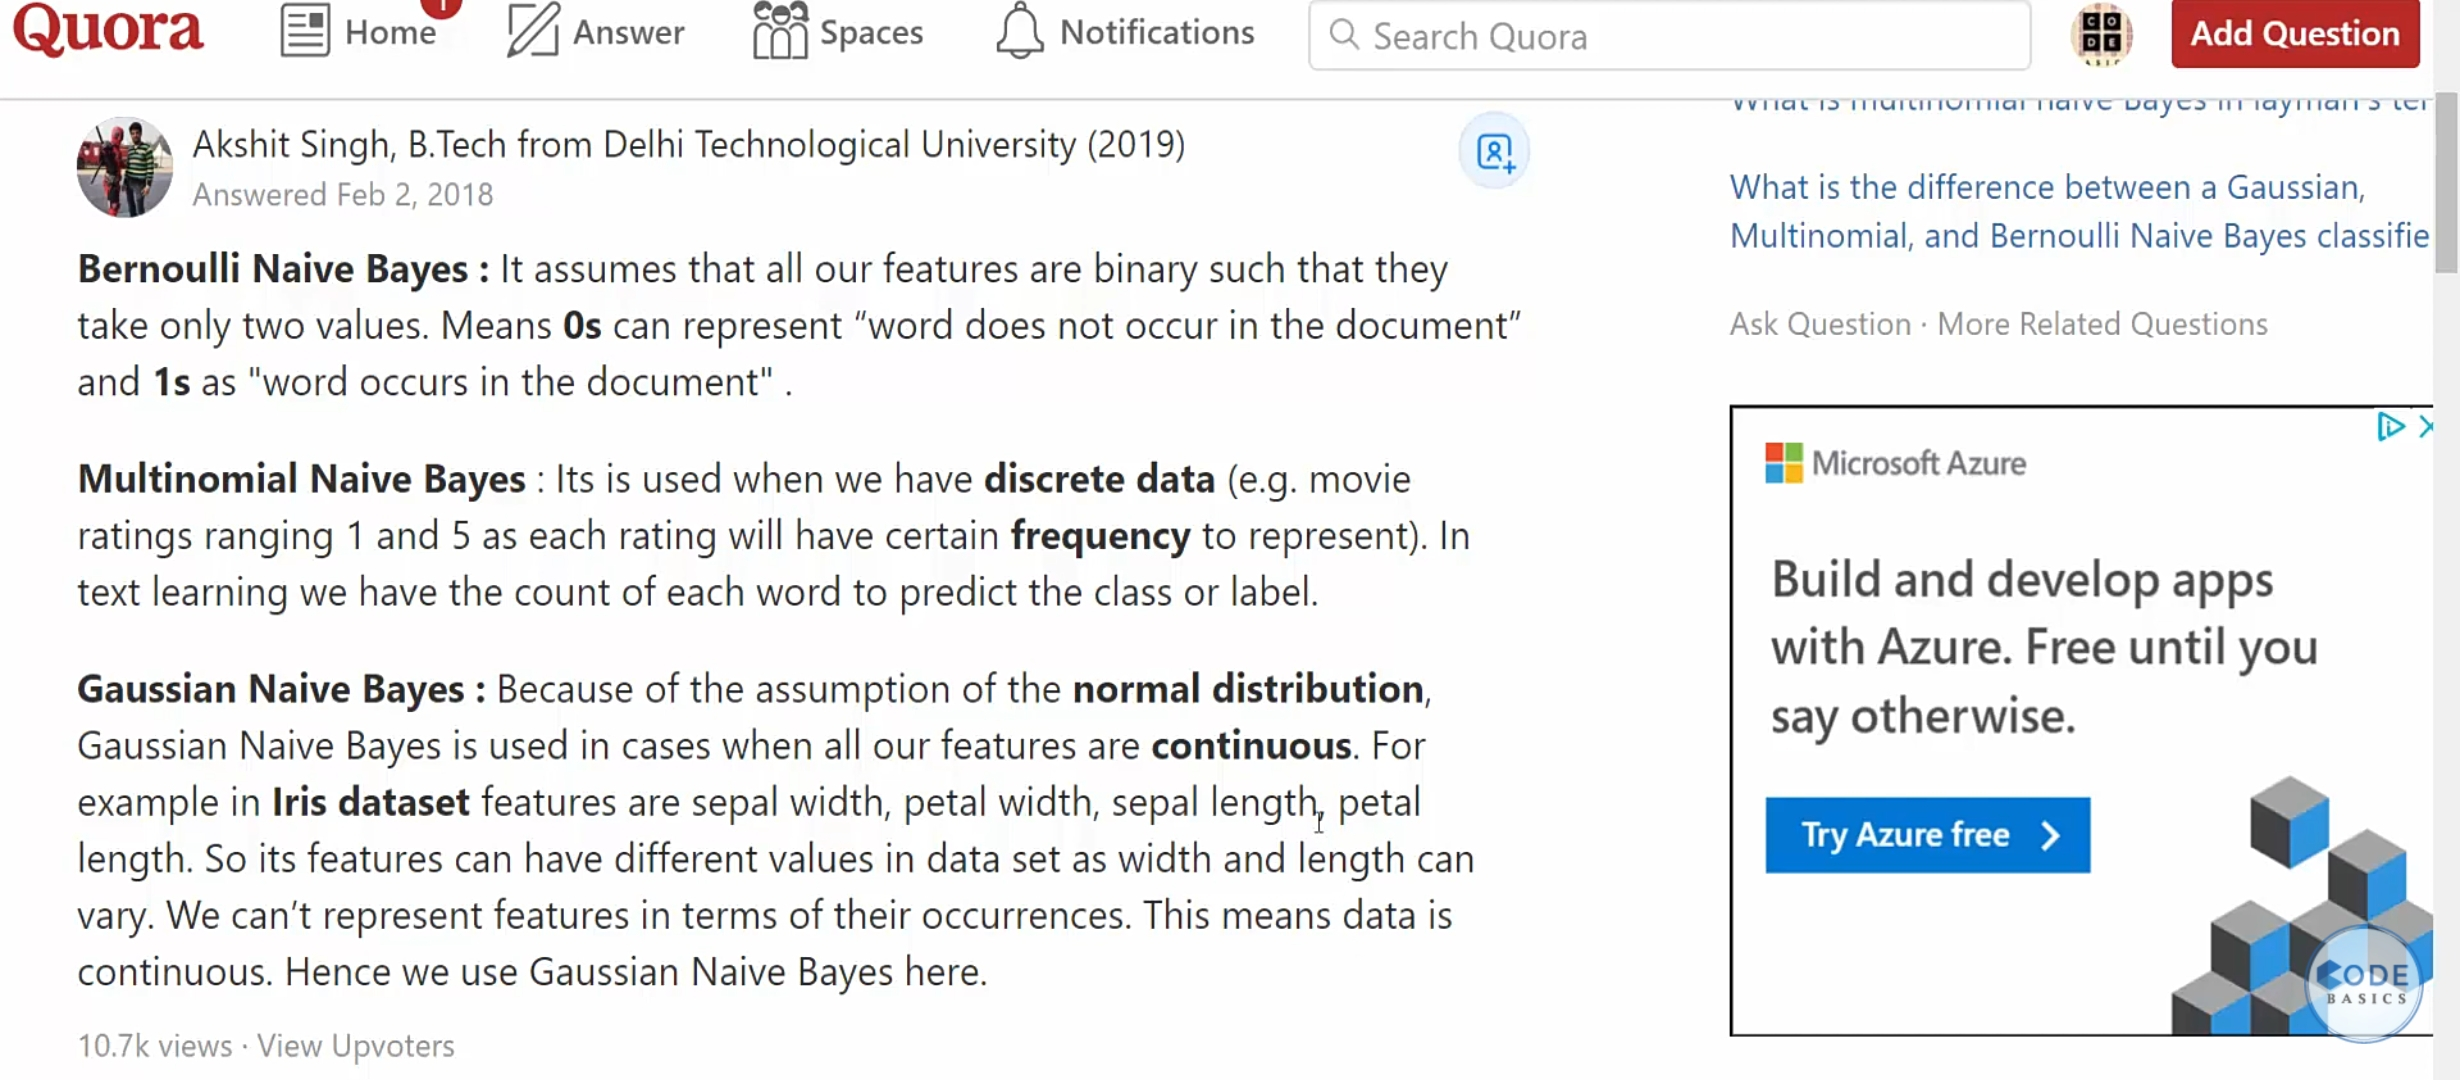

In [80]:
model = MultinomialNB() #? Function call

In [81]:
model.fit(x_train_count,y_train) #? x_train_count: binary count of column'Message ' and y_train: column 'spam'

MultinomialNB()

In [82]:
emails = [
    'Hey mohan, can we get together to watch football game tommorow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [83]:
# that means 1st one is not spam and 2nd one is spam

In [84]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9870782483847811

In [85]:
# pipeline of transportation:
# to create a pipe line and direct using x_train text instead of x_train_count

In [86]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb',MultinomialNB())
])

In [87]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [88]:
clf.score(x_test,y_test)

0.9870782483847811

In [89]:
# HYPER PARAMETER TUNNING:
# How to choose  best machine learning model for a perticular project?

In [90]:
# Model Selection:
# 1.Random Forest
# 2.SVM
# 3.Decision Tree
# 4.Logistic Regression
# 5.Naive Bayes

In [91]:
# if you choose SVM [model = svm.SVC(kernel='rbf', C=30, gamma='auto')]
# there have different parameter like -
# kernel :'rbf','linear','poly'
# C :Integer
# gamma :float
    
# to choose the optymal parameter is called hyper parameter tunning

In [92]:
iris = datasets.load_iris()

In [93]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [96]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [98]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])

In [100]:
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [101]:
x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [102]:
model = svm.SVC(kernel='rbf', C=30, gamma='auto') # first we intialize random parameter cause we dont know which is the best

In [103]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9777777777777777

In [104]:
# first we try svm model
# here we see how to do hyper parameter tunning and how to choose appropriate model

In [105]:
# if we execute train , test split again score might change so we can not rely on this method 
# then we check Kfold cross validation (detail in previous)

In [106]:
cross_val_score(svm.SVC(kernel='linear', C=10, gamma='auto'),iris.data,iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [107]:
cross_val_score(svm.SVC(kernel='rbf', C=10, gamma='auto'),iris.data,iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [108]:
cross_val_score(svm.SVC(kernel='linear', C=20, gamma='auto'),iris.data,iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.93333333, 1.        ])

In [109]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [110]:
# this way we can score optimal using hyperparameter tuning

In [111]:
# GridSearchCV do the exact same thing 
#but it do all permutation and combination so computation will be very high to tackle this another  class is RandomizedSearchCV 

In [112]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00138073, 0.00078144, 0.00048623, 0.00256858, 0.00129733,
        0.00073323]),
 'std_fit_time': array([0.00064832, 0.00039126, 0.00041393, 0.00182326, 0.00048224,
        0.00039809]),
 'mean_score_time': array([0.00100155, 0.00031676, 0.00045447, 0.00139866, 0.00041289,
        0.00046806]),
 'std_score_time': array([3.32557598e-06, 4.09897597e-04, 5.58019698e-04, 7.68769942e-04,
        5.05690210e-04, 4.02251173e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [113]:
df = pd.DataFrame(clf.cv_results_)

In [114]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001381,0.000648,0.001002,0.000003,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000781,0.000391,0.000317,0.000410,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000486,0.000414,0.000454,0.000558,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.002569,0.001823,0.001399,0.000769,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001297,0.000482,0.000413,0.000506,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000733,0.000398,0.000468,0.000402,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [115]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [116]:
dir(clf) #clf =classifier

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [117]:
clf.best_score_

0.9800000000000001

In [118]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [119]:
#RandomizedSearchCV
# (gridsearch 11:22 run time)

In [120]:
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C':[1,10,20],
        'kernel':['rbf','linear']
    },
     cv=5,
     return_train_score=False,
     n_iter=2

)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,20,linear,0.966667


In [121]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest': {
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression': {
        'model':linear_model.LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
    
    
}

In [122]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    

In [123]:
scores

[{'model': 'svm',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9533333333333334,
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}}]

In [124]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [125]:
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


In [126]:
#regularization

In [127]:
#over fitting problem

In [128]:
# age vs matches won
# match won = 0o +0i * age
# higher order polynomial equations

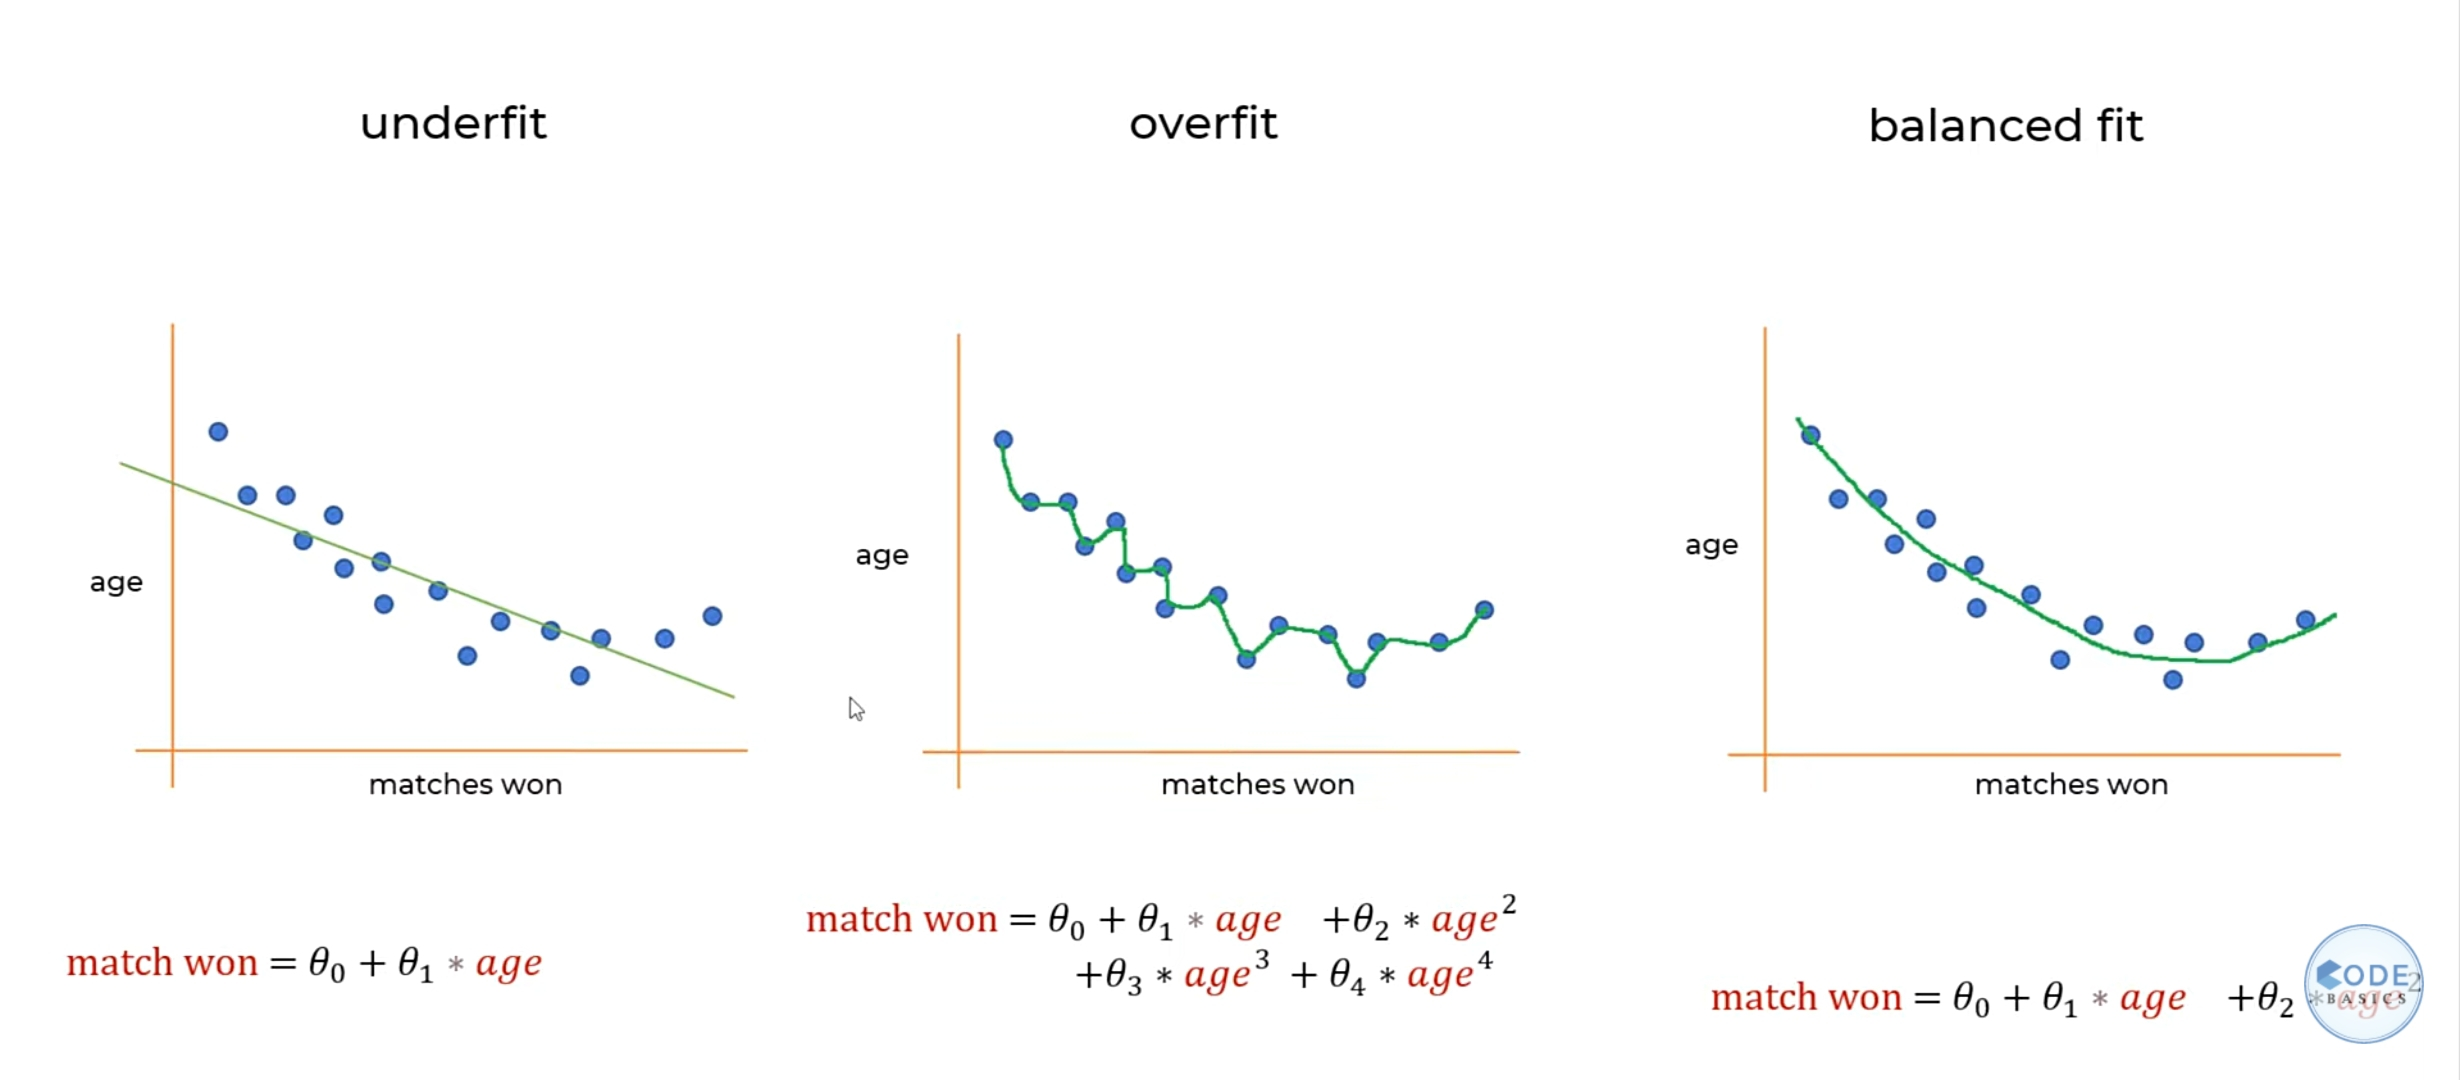

In [129]:
# to reduce over fitting :
# try to make 03 and 04 almost zero of graph 2
#then equation will be : match won = 0o +0i * age +02 *age^2  that is equation of graph 3

In [130]:
# Mean Ssqured Error:
# MSE = 1/n⨊(i=1to n) (yi-y predivteds)^2

In [131]:
# h0(xi)= 0+(01*x1)+(02*x2^2)+(03*x3^3)

In [132]:
# mse = 1/n ⨊(i=1to n)(yi - h0(xi))^2

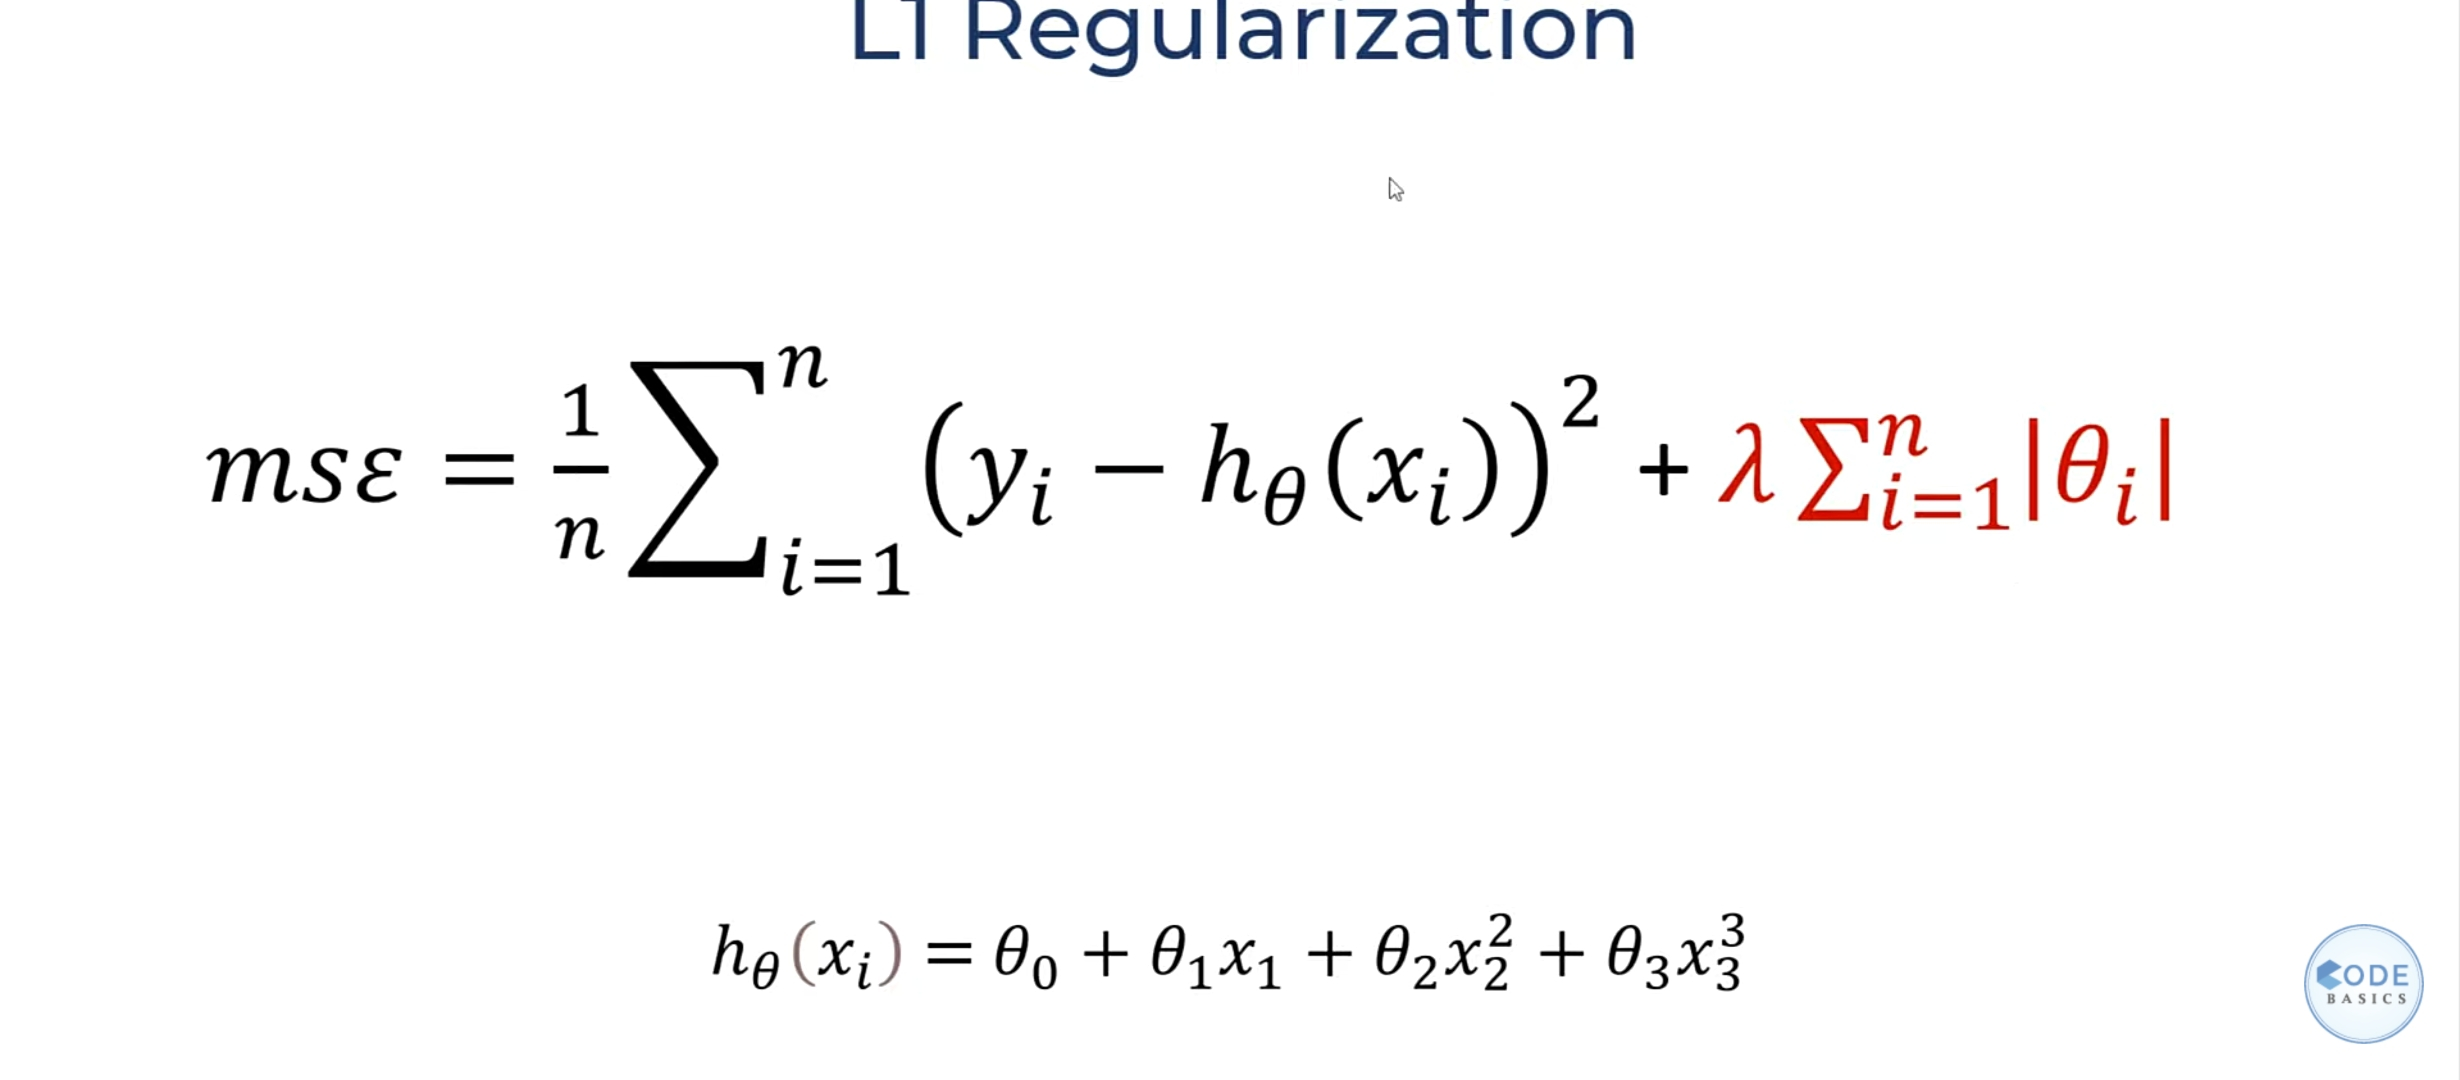

In [133]:
# ??

In [134]:
dataset = pd.read_csv('D:/cars/Houseprice.txt')

In [135]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [136]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [137]:
dataset.shape

(34857, 21)

In [138]:
# which columns we are going to use 

In [139]:
cols_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']

In [140]:
dataset = dataset[cols_to_use] #to filtet columns 

In [141]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [142]:
dataset.shape

(34857, 15)

In [143]:
dataset.isna().sum() #to check if there is any na value in any columns 

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [144]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car'] #this columns have na value can be fill with 0

In [145]:
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0) #to fill na  value with 0

In [146]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [149]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean()) # na  value of Landsize columns have to fill with mean value

In [152]:
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean()) ## na  value of Landsize columns have to fill with mean value

In [153]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [154]:
dataset.dropna(inplace=True)

In [156]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [157]:
dataset = pd.get_dummies(dataset, drop_first = True)  #to create dummy variable(columns)

In [158]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [159]:
# ??

In [160]:
x =dataset.drop('Price', axis=1)
y =dataset['Price']

In [168]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=2)

In [169]:
reg = linear_model.LinearRegression().fit(train_x, train_y)

In [170]:
reg.score(test_x, test_y) #data points are overfitted

0.13853683161590014

In [171]:
reg.score(train_x, train_y)#data points are overfitted

0.6827792395792723

In [173]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1) #?????

In [174]:
lasso_reg.fit(train_x, train_y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326631542478297.5, tolerance: 796258688308222.5
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [175]:
lasso_reg.score(test_x, test_y)

0.6636111369404488

In [176]:
lasso_reg.score(train_x, train_y)

0.6766985624766824

In [179]:
ridge_reg = Ridge(alpha = 50,max_iter=100, tol=0.1)# ???
ridge_reg.fit(train_x, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [181]:
ridge_reg.score(train_x,train_y)

0.6622376739684328

In [182]:
ridge_reg.score(test_x,test_y)

0.6670848945194958